In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from matplotlib import cm

In [13]:
data = pd.read_csv('scRNAseq_LOY_SCR_vs_WTY_SCR_Epithelial_cell_gseGO.csv',index_col=0)
data = data.loc[data['ONTOLOGY']=='BP',:].copy()
data = data.loc[data['p.adjust']<0.05,:].copy()
#Select top pathways
up = data.iloc[:4,:].copy()
down = data.iloc[-16:,:].copy()
#Combine
data = pd.concat([up,down],axis=0)
data

,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
GO:0061615,BP,GO:0061615,glycolytic process through fructose-6-phosphate,22,0.720362,2.283214,5.766451e-05,8.215644e-03,7.702895e-03,410,"tags=27%, list=3%, signal=27%",PKM/TPI1/PGK1/ENO1/PFKP/PGAM1
GO:0031639,BP,GO:0031639,plasminogen activation,20,0.734034,2.275738,5.664138e-05,8.215644e-03,7.702895e-03,948,"tags=60%, list=7%, signal=56%",THBS1/PGK1/ANXA2/PLAU/PLAT/PLAUR/S100A10/SERPI...
GO:0006007,BP,GO:0006007,glucose catabolic process,22,0.687087,2.177747,1.876130e-04,1.548812e-02,1.452148e-02,410,"tags=27%, list=3%, signal=27%",PKM/TPI1/PGK1/ENO1/PFKP/PGAM1
GO:0050832,BP,GO:0050832,defense response to fungus,29,0.607899,2.086625,3.093674e-04,2.101084e-02,1.969952e-02,641,"tags=17%, list=5%, signal=16%",GAPDH/S100A9/S100A8/COTL1/RARRES2
GO:0009060,BP,GO:0009060,aerobic respiration,150,-0.554936,-1.516526,9.457121e-05,1.169288e-02,1.096311e-02,1794,"tags=34%, list=13%, signal=30%",ARL2/COA6/NDUFC2/NDUFB2/NDUFA10/COX7B/SUCLG1/N...
GO:0022904,BP,GO:0022904,respiratory electron transport chain,99,-0.569331,-1.527117,4.077689e-04,2.621682e-02,2.458059e-02,1798,"tags=40%, list=13%, signal=35%",ETFB/COA6/NDUFC2/NDUFB2/NDUFA10/PUM2/COX7B/NDU...
GO:0050684,BP,GO:0050684,regulation of mRNA processing,111,-0.574371,-1.548217,1.593264e-04,1.422726e-02,1.333932e-02,2455,"tags=41%, list=18%, signal=34%",SRSF3/THRAP3/ZC3H14/HNRNPU/SMU1/RBM3/PRPF19/CE...
GO:0006446,BP,GO:0006446,regulation of translational initiation,77,-0.593674,-1.565277,2.255651e-04,1.754314e-02,1.644825e-02,855,"tags=26%, list=6%, signal=24%",CCL5/EIF1B/NCBP2/EIF4G2/PAIP2/UHMK1/TPR/NCK1/P...
GO:0006413,BP,GO:0006413,translational initiation,113,-0.585590,-1.579287,3.206377e-05,6.442147e-03,6.040084e-03,2016,"tags=35%, list=15%, signal=30%",RPS6KB2/KHDRBS1/EIF3K/MTIF3/COPS5/EIF3M/EIF3I/...
GO:0042274,BP,GO:0042274,ribosomal small subunit biogenesis,96,-0.597773,-1.600340,7.821016e-05,1.005674e-02,9.429085e-03,1277,"tags=22%, list=9%, signal=20%",RPS8/RPS15/XRCC5/GTF2H5/C1orf131/RPS23/RPS28/R...


In [18]:
import math
data['logpadj'] = [-math.log(max(i,1e-3),10) for i in data['p.adjust']]

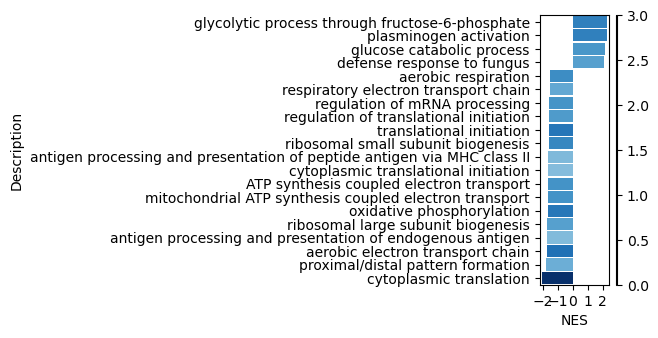

In [21]:
fig, axs = plt.subplots(1,2,figsize=(1,3.5),width_ratios=(60,1))#

ax = axs[0] 
norm = mpl.colors.Normalize(vmin=0,vmax=3)
mapper = cm.ScalarMappable(norm=norm,cmap=cm.Blues)
colors = [mapper.to_rgba(i) for i in data['logpadj']]
sns.barplot(y=data['Description'], x=data['NES'],width=0.9,saturation=1,orient='h',
            palette=colors,ax=ax)

ax.set(xlim=(-2.2,2.4))
x_majorocator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_majorocator)
plt.tick_params(left=False)

ax = axs[1]
mpl.colorbar.ColorbarBase(ax, cmap=cm.Blues,norm=norm)

plt.savefig('Fig3g_scRNAseq_Epithelial_cell_LOYvsWTY_GSEA_GOBP_top4_bottom16_bar.pdf',dpi=300)
